# Under- and overfitting, model selection

## Preliminaries

In the first set of exercises you had to implement the training and evaluation of the linear regression and $k$-NN methods from scratch in order to practice your `numpy` skills. From this set of exercises onward, you can use the implementations provided in `scikit-learn` or other higher-level libraries. We start this set of exercises by demonstrating some of the features of `scikit-learn`.

For example, implementation of linear regression model fitting with an analytical solution for the parameters is provided by the class `sklearn.linar_model.LinearRegression`. You can train a linear regression model in the following way:

In [1]:
import numpy as np
from sklearn import datasets, linear_model

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# use only one feature
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# create linear regression object
model = linear_model.LinearRegression()

# train the model using the training dataset
model.fit(X_train, y_train)

LinearRegression()

Let's visualize the training dataset and the learned regression model.

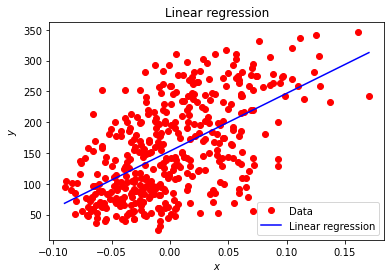

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(X_train, y_train, 'r.', markersize=12)
X_edge = np.array([np.min(X_train, 0), np.max(X_train, 0)])
plt.plot(X_edge, model.predict(X_edge), 'b-')
plt.legend(('Data', 'Linear regression'), loc='lower right')
plt.title('Linear regression')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Once trained, the model can be used to make predictions on the test data:

In [3]:
# Make predictions using the testing dataset
prediction = model.predict(X_test)

The next step (not shown here) is to evaluate the performance of the trained model.

Note that the `scikit-learn` interface works by first initializing an object from the class that implements the machine learning model (linear regression in this case) and then fitting the initialized model using the data in the training set. Finally, the trained (fitted) model can be used to make predictions on unseen data. In fact, all models implemented in this library follow the same *initialize-fit-predict* programming interface. For example, a $k$-NN classifier can be trained in the following way:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors

breast_cancer = datasets.load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

# make use of the train_test_split() utility function instead
# of manually dividing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)

# initialize a 3-NN classifier
model = neighbors.KNeighborsClassifier(n_neighbors=3)

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)

Note that the features in the breast cancer dataset have different scales (some have on average very small absolute values, and some very large), which means that the distance metric used by $k$-NN will me dominated by the features with large values. You can use any of the number of feature transformation methods implemented in `scikit-learn` to scale the features. For example, you can use the `sklearn.preprocessing.StandardScaler` method to transform all features to a have a zero mean and unit variance:

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

The scaler has its own parameters which are the means and standard deviations of the features estimated from the training set. If you train a model with the scaled features, you will have to remember to also apply the scaling transformation every time you make a prediction on new unseen and unscaled data. This is somewhat prone to error. One option for making the code more robust is to create a processing pipeline that includes the scaling and $k$-NN models in a sequence:

In [6]:
from sklearn.pipeline import Pipeline

knn = neighbors.KNeighborsClassifier(n_neighbors=3)

model = Pipeline([
                 ("scaler", scaler),
                 ("knn", knn)
                ])

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)


If you are curious, more information about the design of the `scikit-learn` application programming interface (API) can be found [in this paper](https://arxiv.org/pdf/1309.0238.pdf). 

## Exercises

### Bias-variance decomposition

Show that the mean squared error of the estimate of a parameter can be decomposed into an expression that includes both the bias and variance (Eq. 5.53-5.54 in "Deep learning" by Goodfellow et al.). 

$MSE = \mathbb{E}[(\hat{\theta_m}-\theta)^2]$

Eliminating the brackets gives us:

$\mathbb{E}[(\hat{\theta_m}-\theta)^2] = \mathbb{E}[\hat{\theta_m}^2] + \theta^2-2\mathbb{E}[\hat{\theta_m}]\theta$


For the bias and variance holds:

$Bias(\hat{\theta_m}) = \mathbb{E}[\hat{\theta_m}]-\theta$


$Var(\hat{\theta_m}) = \mathbb{E}[\hat{\theta_m}^2]-\mathbb{E}^2[\hat{\theta_m}]$

Squaring the bias and again eliminating the brackets gives:

$Bias(\hat{\theta_m})^2 = (\mathbb{E}[\hat{\theta_m}]-\theta)^2$

$= \mathbb{E}^2[\hat{\theta_m}]+\theta^2-2\mathbb{E}[\theta_m]\theta$

Adding this to the variance gives:

$Bias(\hat{\theta_m})^2 + Var(\hat{\theta_m}) = \mathbb{E}^2[\hat{\theta_m}]+\theta^2-2\mathbb{E}[\theta_m]\theta + \mathbb{E}[\hat{\theta_m}^2]-\mathbb{E}^2[\hat{\theta_m}]$

$=\mathbb{E}[\hat{\theta_m}^2] + \theta^2-2\mathbb{E}[\hat{\theta_m}]\theta = MSE$

Hence $MSE = Bias^2(\hat{\theta_m}) + Var(\hat{\theta_m})$

### Polynomial regression

For this exercise we will be using generated data to better show the effects of the different polynomial orders.
The data is created using the make_polynomial_regression function.

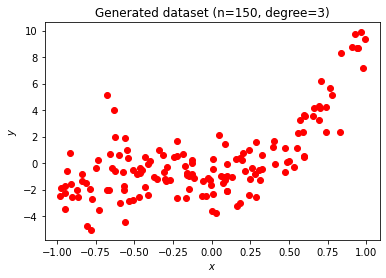

In [7]:
%matplotlib inline

def generate_dataset(n=100, degree=1, noise=1, factors=None):
    # Generates a dataset by adding random noise to a randomly
    # generated polynomial function.
    
    x = np.random.uniform(low=-1, high=1, size=n)
    
    factors = np.random.uniform(0, 10, degree+1)
    
    y = np.zeros(x.shape)
    
    for idx in range(degree+1):
        y += factors[idx] * (x ** idx)

    # add noise
    y += np.random.normal(-noise, noise, n)
    
    return x, y

# load generated data
np.random.seed(2)

X, y = generate_dataset(n=150, degree=3, noise=1.5)

plt.plot(X, y, 'r.', markersize=12)
plt.title('Generated dataset (n=150, degree=3)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Implement polynomial regression using the `sklearn.preprocessing.PolynomialFeatures` transformation. Using the `sklearn.grid_search.GridSearchCV` class, perform a grid search of the polynomial order hyperparameter space with cross-validation and report the performance on an independent test set.

Plot a learning curve that show the validation accuracy as a function of the polynomial order. 

<p><font color='#770a0a'>Which models have a high bias, and which models have high variance? Motivate your answer.</font><p>
    
Repeat this experiment, this time using the diabetes dataset instead of the generated data.

In [8]:
# Import necessary libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import operator
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


The optimal degree for polynomial regression is 3
The MSE for the training set: 2.48
The MSE for the test set: 1.61


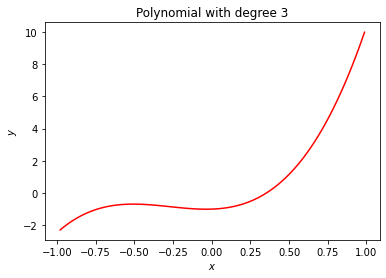

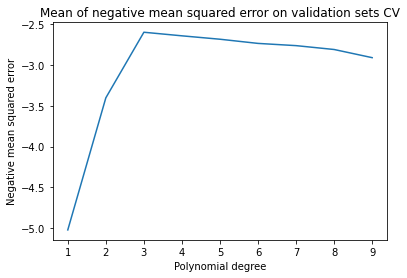

In [9]:
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create pipeline with scaler, polynomial features and the linear regression model
scaler = StandardScaler()
model = make_pipeline(scaler, PolynomialFeatures(), linear_model.LinearRegression())

# Define the degrees of the polynomial as hyperparameter space for the CV
degree_space = np.arange(1,10)
parms = {'polynomialfeatures__degree': degree_space}

# Initiate CV and fit
gscv = GridSearchCV(model, parms, cv = 10, scoring='neg_mean_squared_error', return_train_score=True)
gscv.fit(X_train.reshape(-1,1),y_train)
space = np.linspace(np.min(X_train),np.max(X_train),101).reshape(-1,1)

# Return estimated best degree for polynomial regression
est_deg = gscv.best_params_['polynomialfeatures__degree']
print('The optimal degree for polynomial regression is ' + str(est_deg))
      
# make predictions for training and test set
preds_train = gscv.predict(X_train.reshape(-1,1))
preds_test = gscv.predict(X_test.reshape(-1,1))

# calculate MSE for training and test set
print("The MSE for the training set: {:.2f}".format(MSE(y_train, preds_train)))
print("The MSE for the test set: {:.2f}".format(MSE(y_test, preds_test)))

# visualize results
plt.plot(space, gscv.predict(space), color = 'red')
plt.title('Polynomial with degree ' + str(est_deg))
plt.xlabel('$x$')
plt.ylabel('$y$')

fig, ax = plt.subplots(1, 1)
ax.plot(degree_space, gscv.cv_results_['mean_test_score'])
plt.title('Mean of negative mean squared error on validation sets CV')
plt.xlabel('Polynomial degree')
plt.ylabel('Negative mean squared error')
plt.show()

The closer the negative MSE to zero, the better the fit. We noticed in the derivation above that the MSE can be decomposed into $MSE = Bias^2(\hat{\theta_m}) + Var(\hat{\theta_m})$. The plot above shows that from polynomial order 1 until the actual order of the polynome (=3) the absolute value of the MSE decreases. The bias decreases as well because the degree / parameters of the fit are getting closer to parameters that have actually generated the data. For higher orders than 3, the absolute value of the negative MSE increases. This is due to the variance of the model increasing because of overfitting. The higher the order of the polynome, the more specific the fit to the training dataset and the higher the variance (and thus absolute value of the negative mean squared error). The variance increases during overfitting because a small change in training dataset will lead to a very different fit of the model.

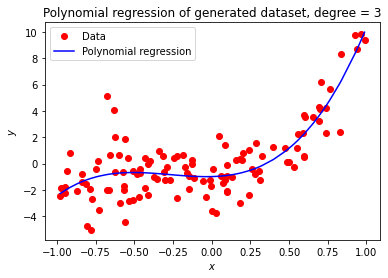

In [10]:
# Fit and plot for the optimal degree of polynomial together with the data points
X_train = X_train[:, np.newaxis]
poly = PolynomialFeatures(est_deg)
X_poly = poly.fit_transform(X_train)

model = linear_model.LinearRegression()
model.fit(X_poly, y_train)
y_poly_pred = model.predict(X_poly)

plt.plot(X_train, y_train, 'r.', markersize=12)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_poly_pred), key=sort_axis)
X_train, y_poly_pred = zip(*sorted_zip)

plt.plot(X_train, y_poly_pred, color='b')
plt.legend(('Data', 'Polynomial regression'), loc='upper left')
plt.title('Polynomial regression of generated dataset, degree = ' + str(est_deg))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

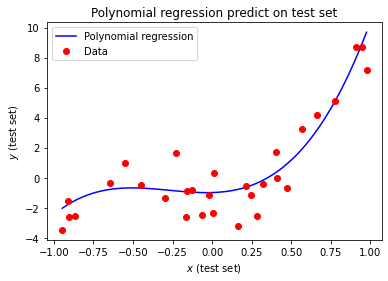

In [11]:
# Predict + measure performance on independent test set
X_test = X_test[:, np.newaxis]

# And we predict on the test set
y_pred_test = gscv.predict(X_test)

space = np.linspace(np.min(X_test),np.max(X_test),101).reshape(-1,1)
plt.plot(space, gscv.predict(space), color = 'blue')
plt.plot(X_test, y_test, 'r.', markersize=12)
plt.legend(('Polynomial regression', 'Data'), loc='upper left')
plt.title('Polynomial regression predict on test set')
plt.xlabel('$x$ (test set)')
plt.ylabel('$y$ (test set)')
plt.show()


### Polynomial regression on diabetes dataset

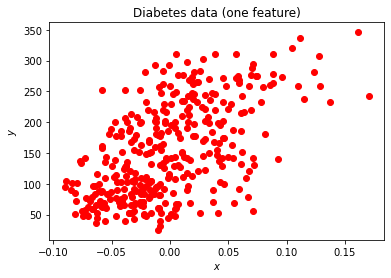

In [12]:
# load the diabetes dataset
diabetes = datasets.load_diabetes()

# use only one feature?
X_diab = diabetes.data[:, np.newaxis, 2]
y_diab = diabetes.target

# split data in train and test set
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(X_diab, y_diab, test_size=0.2)

# plot the training data
plt.plot(X_train_diab, y_train_diab, 'r.', markersize=12)
plt.title('Diabetes data (one feature)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


The optimal degree for polynomial regression is 2
The MSE for the training set: 3939.60
The MSE for the test set: 3721.99


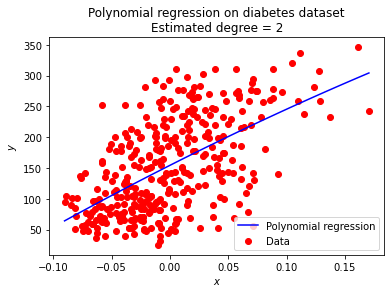

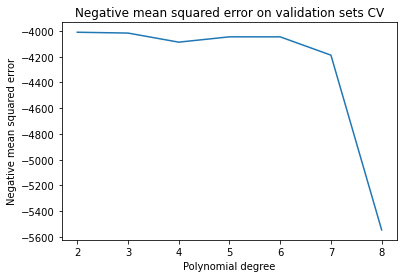

In [13]:
# Create pipeline with scaler, polynomial features and the linear regression model

scaler_diab = StandardScaler()
model_diab = make_pipeline(scaler_diab, PolynomialFeatures(), linear_model.LinearRegression())

# Define the degrees of the polynomial as hyperparameter space for the CV
degree_space = np.arange(2,9)
parms = {'polynomialfeatures__degree': degree_space}

# Initiate CV and fit
gscv_diab = GridSearchCV(model_diab, parms, cv = 10, scoring='neg_mean_squared_error', return_train_score=True)
gscv_diab.fit(X_train_diab.reshape(-1,1),y_train_diab)
space = np.linspace(np.min(X_train_diab),np.max(X_train_diab),101).reshape(-1,1)

# Return estimated best degree for polynomial regression
est_deg = gscv_diab.best_params_['polynomialfeatures__degree']
print('The optimal degree for polynomial regression is ' + str(est_deg))

# make predictions for training and test set
preds_train = gscv_diab.predict(X_train_diab.reshape(-1,1))
preds_test = gscv_diab.predict(X_test_diab.reshape(-1,1))

# calculate MSE for training and test set
print("The MSE for the training set: {:.2f}".format(MSE(y_train_diab, preds_train)))
print("The MSE for the test set: {:.2f}".format(MSE(y_test_diab, preds_test)))

# visualize the results
plt.plot(space, gscv_diab.predict(space), color = 'blue')
plt.scatter(X_train_diab, y_train_diab, color='red')
plt.legend(('Polynomial regression', 'Data'), loc='lower right')
plt.title('Polynomial regression on diabetes dataset\nEstimated degree = ' + str(est_deg))
plt.xlabel('$x$')
plt.ylabel('$y$')

fig, ax = plt.subplots(1, 1)
ax.plot(degree_space, gscv_diab.cv_results_['mean_test_score'])
plt.title('Negative mean squared error on validation sets CV')
plt.xlabel('Polynomial degree')
plt.ylabel('Negative mean squared error')
plt.show()


The recommended degree of 6 for the polynomial regression is possible. However when we look at the accuracy curve of the validation sets, the oscillation of the negative MSE values seems to indicate overfitting. Also when looking at the scatterplot with the fitted regression line, it is debatable whether the fit is maybe a bit too specific for this training set.

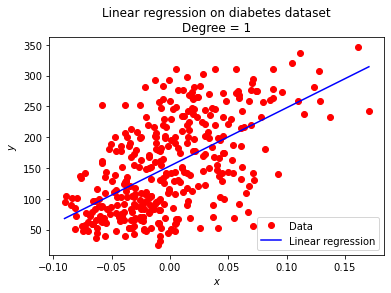

In [14]:
# Fit and plot for the optimal degree of polynomial together with the data points
poly = PolynomialFeatures(1)
X_poly = poly.fit_transform(X_train_diab)

model = linear_model.LinearRegression()
model.fit(X_poly, y_train_diab)
y_poly_pred = model.predict(X_poly)
plt.plot(X_train_diab, y_train_diab, 'r.', markersize=12)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train_diab,y_poly_pred), key=sort_axis)
X_train_diab, y_poly_pred = zip(*sorted_zip)
plt.plot(X_train_diab, y_poly_pred, color='b')
plt.legend(('Data', 'Linear regression'), loc='lower right')
plt.title('Linear regression on diabetes dataset\nDegree = 1')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Fitting the order 1 regression line looks like a more reasonable / general fit than the polynomial degree we obtained from the grid search above. As a a final test, we predict on the test set with the recommended polynomial obtained from the grid search

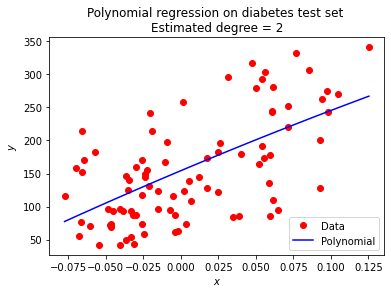

In [15]:
# Predict + measure performance on independent test set
from sklearn.metrics import mean_squared_error

plt.plot(X_test_diab, y_test_diab, 'r.', markersize=12)
y_pred_test_diab = gscv_diab.predict(X_test_diab)

# Plot regression line as well
space = np.linspace(np.min(X_test_diab),np.max(X_test_diab),101).reshape(-1,1)
plt.plot(space, gscv_diab.predict(space), color = 'blue')
plt.legend(('Data', 'Polynomial'), loc='lower right')
plt.title('Polynomial regression on diabetes test set \nEstimated degree = ' + str(est_deg))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


### ROC curve analysis
A common method to evaluate binary classifiers is the receiver operating characteristic (ROC) curve. Similar to the week one practicals, implement a $k$-NN classifier on the breast cancer dataset, however, his time use the $k$-NN pipeline from the preliminary. Train the model for different values of $k$ and evaluate their respective performance with an ROC curve, use the `sklearn.metrics.roc_curve` function.

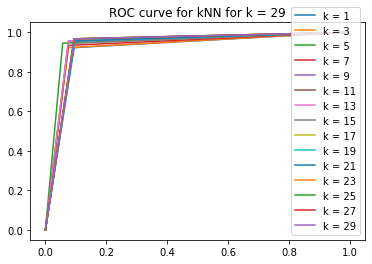

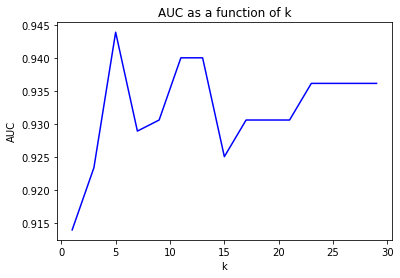

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors
from sklearn import metrics


breast_cancer = datasets.load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

# make use of the train_test_split() utility function instead
# of manually dividing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)

ks = range(1,31,2)
legend = []
aucs = []

for k in ks:

    # initialize a 3-NN classifier
    model = neighbors.KNeighborsClassifier(n_neighbors=k)

    # train the model using the training dataset

    model.fit(X_train, y_train)

    # predict on test set

    y_pred = model.predict(X_test)

    # plot the roc curve

    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    aucs.append(metrics.auc(fpr, tpr))
    
    plt.plot(fpr, tpr)
    plt.title('ROC curve for kNN for k = ' + str(k))
    legend.append('k = ' + str(k))
    
plt.legend(legend, loc='lower right')
plt.show()

plt.plot(ks, aucs, 'b-')
plt.title('AUC as a function of k')
plt.xlabel('k')
plt.ylabel('AUC')
plt.show()

The AUC-score of the ROC-curve was plotted to evaluate the performance for varying values of $k$. It can be seen that the AUC decreases from $k$ = 1 to $k$ = 5. For values of $k$ larger than 5, the performance decreases. $k$ = 5 seems the optimal value for this application.

### $F_1$ score and Dice similarity coefficient

The Dice similarity coefficient is a very popular evaluation measure for image segmentation applications. Assuming that $A$ is the ground truth segmentation of an object represented as a binary image, and $B$ is the binary output of an image segmentation method, the Dice similarity coefficient is computed as:

$\text{Dice}(A,B) = \frac{2|A\cap B|}{|A| + |B|}$

where $|\cdot|$ represents the cardinality of the objects (e.g. $|A|$ is the number of non-zero pixels in the ground truth segmentation).

For example, the Dice similarity can be computed in the following way:

0.3402777777777778


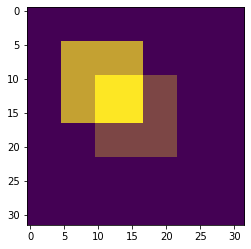

In [17]:
# generate some test objects
A = np.zeros((32, 32))
A[10:-10, 10:-10] = 1
B = np.zeros((32, 32))
B[5:-15, 5:-15] = 1

dice = 2*np.sum(A*B)/(np.sum(A)+np.sum(B))

# display the results
plt.plot()
plt.imshow(A)
plt.imshow(B, alpha=0.7)

print(dice)

<p><font color='#770a0a'>Show that the $F_1$ score, which is the harmonic mean of precision and recall, is equivalent to the Dice similarity coefficient</font><p>

### Background information

$ \text{F}_1\text{-score} = \frac{1}{\frac{1}{\text{Precision}}+\frac{1}{\text{Recall}}}$ 

$\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}$

$\text{Recall} = \frac{\text{TP}}{\text{TP+FN}}$

Substituting Recall and Precision equations in formula for $\text{F}_1$-score gives:

$\text{F}_1\text{-score} = \frac{\text{TP}}{\text{TP}+\frac{1}{2}(\text{FN+FP})}$

Or mathematically speaking, the Dice similarity coefficient is twice the intersection of A and B divided by the sum of the cardinality of A and B. The intersection of A and B is equal to the amount of TP (true positives). The cardinality of A plus the cardinality of B is equal to the union of A and B plus the intersection of A and B. The union of A and B can also be seen as TP + FN + FP.

$|A\cap B|$ indicates the overlap between the two segmentation, e.g. the pixels that are correctly classified (TP)

$|A|$ indicates all pixels in segmentation A, which consists of the correctly classified pixels plus the pixels that are falsly classified as negative by B. 

$|B|$ indicates all pixels in segmentation B, which consists of the overlap between both segmentations (TP) plus the pixels that are falsly classified as positive by B.

In other words:

$\text{Union} = \text{TP + FN + FP}$

$\text{Intersection} = \text{TP}$

Dice similarity coefficient $= \frac{2*\text{Intersection}}{\text{Union+Intersection}}$

$= \frac{2*\text{TP}}{\text{TP + FN + FP + TP}}$

$= \frac{2*\text{TP}}{2*\text{TP+FN+FP}}$

Divide by 2 above and below the division line gives:

$= \frac{\text{TP}}{\text{TP} + \frac{1}{2}(\text{FN + FP})} = \text{F}_1\text{-score}$



### Python implementation

In [18]:
TP = np.sum(A*B)
TN = A.shape[0]*A.shape[1]-TP
FN = np.sum(np.logical_and(A == 0, B == 1))
FP = np.sum(np.logical_and(A == 0, B == 1))

In [19]:
F1 = TP/(TP+0.5*(FN+FP))
F1

0.3402777777777778

Which is indeed equal to the Dice similarity coefficient we calculated above